In [1]:
import torch
import numpy as np
import time
from matplotlib import pyplot as plt
from hd_python import hamming_distance, torch_hd

# Functions

In [2]:

def cosine(a, b):
    return torch.cosine_similarity(a, b)

def euclidean(a, b):
    return torch.cdist(a, b)

def clip(a, b):
    logits_per_text = torch.matmul(a, b.t())
    probs = logits_per_text.softmax(dim=1)
    return probs.argmax(1)

def band(a, b):
    return a & b

def bmul(a, b):
    return a * b

def bxor(a, b):
    return torch.bitwise_xor(a, b)

def numpy_nonzero(a, b):
    return np.count_nonzero(a != b)


# same samples varies in size

In [5]:
a_times = {}
for i in range(50):
    asize = 512+i*256
    a_times[asize] = []
    bf = torch.rand((5000, asize), dtype=torch.float)
    for j in range(2010):
        af = torch.rand((1, asize), dtype=torch.float)
        t = time.time()
        clip(af, bf)
        a_times[asize].append(time.time() - t)

In [58]:
a_times.keys()

dict_keys([512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352])

In [50]:
np.mean(a_times[asize])

0.0010184258370850216

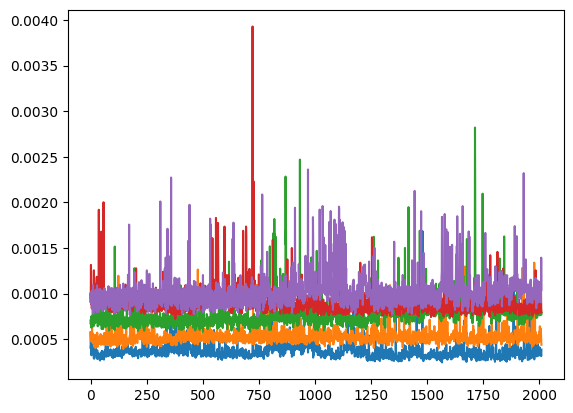

In [51]:
for asize in a_times:
    plt.plot(a_times[asize])

In [6]:
b_times = {}
for i in range(50):
    bsize = 512+i*512
    b_times[bsize] = []
    bb = torch.rand((5000, bsize)) > 0.5
    for j in range(2010):
        ab = torch.rand((1, bsize)) > 0.5
        t = time.time()
        bxor(ab, bb)
        b_times[bsize].append(time.time() - t)

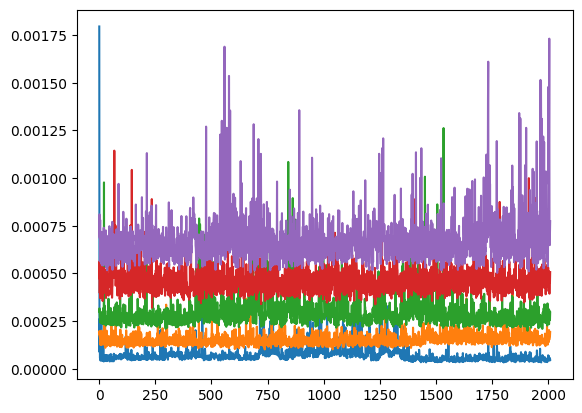

In [21]:
for bsize in b_times:
    plt.plot(b_times[bsize])

In [7]:
c_times = {}
for i in range(50):
    csize = 256+i*512
    c_times[csize] = []
    cb = torch.rand((5000, csize)) > 0.5
    for j in range(2010):
        ac = torch.rand((1, csize)) > 0.5
        t = time.time()
        clip(ac, cb)
        c_times[csize].append(time.time() - t)

RuntimeError: "addmm_impl_cpu_" not implemented for 'Bool'

In [ ]:
for csize in c_times:
    plt.plot(c_times[csize])

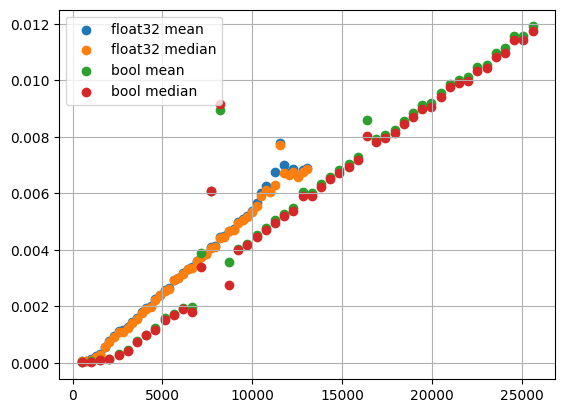

In [90]:
ax = []
aymean = []
aymedian = []
for asize in a_times:
    ax.append(asize)
    aymedian.append(np.median(a_times[asize]))
    aymean.append(np.mean(a_times[asize]))
bx = []
bymedian = []
bymean = []
for bsize in b_times:
    bx.append(bsize)
    bymedian.append(np.median(b_times[bsize]))
    bymean.append(np.mean(b_times[bsize]))
cx = []
cymedian = []
cymean = []
for csize in c_times:
    cx.append(csize)
    cymedian.append(np.median(c_times[csize]))
    cymean.append(np.mean(c_times[csize]))
plt.scatter(ax, aymean, label='float clip mean')
plt.scatter(ax, aymedian, label='float clip median')
plt.scatter(bx, bymean, label='bool xor mean')
plt.scatter(bx, bymedian, label='bool xor median')
plt.scatter(bx, bymean, label='bool clip mean')
plt.scatter(bx, bymedian, label='bool clip median')
plt.grid()
# plt.xlim(0, 5000)
# plt.ylim(0, 0.0005)
plt.legend(loc="upper left")

# Varied sample and sizes

In [18]:
a_times = {}
for h in range(1, 8):
    a_times[h*5000] = {}
    for i in range(5):
        asize = 512+i*512
        a_times[h*5000][asize] = []
        bf = torch.rand((5000*h, asize), dtype=torch.float)
        for j in range(2010):
            af = torch.rand((1, asize), dtype=torch.float)
            t = time.time()
            clip(af, bf)
            a_times[h*5000][asize].append(time.time() - t)

In [7]:
b_times = {}
for h in range(1, 8):
    b_times[h*5000] = {}
    for i in range(5):
        bsize = 512+i*512
        b_times[h*5000][bsize] = []
        bb = torch.rand((5000*h, bsize)) > 0.5
        for j in range(2010):
            ab = torch.rand((1, bsize)) > 0.5
            t = time.time()
            bxor(ab, bb)
            b_times[h*5000][bsize].append(time.time() - t)

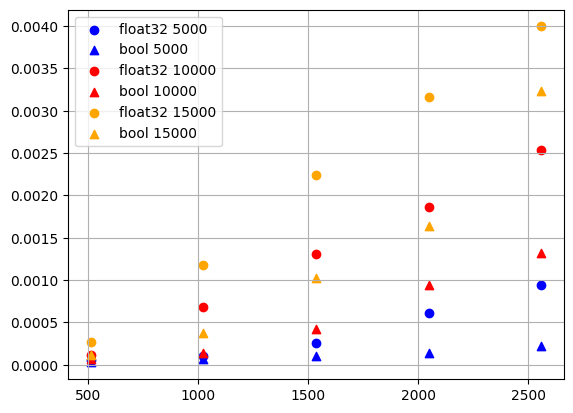

In [24]:
colors = [None, 'blue', 'red', 'orange', 'green', 'cyan']
for h in range(1, 4):
    size = h*5000
    ax = []
    aymean = []
    aymedian = []
    for asize in a_times[size]:
        ax.append(asize)
        aymedian.append(np.median(a_times[size][asize]))
        aymean.append(np.mean(a_times[size][asize]))
    bx = []
    bymedian = []
    bymean = []
    for bsize in b_times[size]:
        bx.append(bsize)
        bymedian.append(np.median(b_times[size][bsize]))
        bymean.append(np.mean(b_times[size][bsize]))
    plt.scatter(ax, aymedian, label=f'float32 {size}', marker='o', color=colors[h])
    plt.scatter(bx, bymedian, label=f'bool {size}', marker='^', color=colors[h])
plt.grid()
# plt.xlim(0, 5000)
# plt.ylim(0, 0.0005)
plt.legend(loc="upper left")

In [12]:
b_times.keys()

dict_keys([5000, 10000, 15000, 20000, 25000, 30000, 35000])